In [15]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
url = "https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue"
Page = requests.get(url)

In [3]:
Soup = BeautifulSoup(Page.text, "html")
# print(Soup)

In [4]:
Table = Soup.find_all("table")
print(Table)

[<table class="box-More_citations_needed plainlinks metadata ambox ambox-content ambox-Refimprove" role="presentation"><tbody><tr><td class="mbox-image"><div class="mbox-image-div"><span typeof="mw:File"><a class="mw-file-description" href="/wiki/File:Question_book-new.svg"><img alt="" class="mw-file-element" data-file-height="399" data-file-width="512" decoding="async" height="39" src="//upload.wikimedia.org/wikipedia/en/thumb/9/99/Question_book-new.svg/50px-Question_book-new.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/9/99/Question_book-new.svg/75px-Question_book-new.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/9/99/Question_book-new.svg/100px-Question_book-new.svg.png 2x" width="50"/></a></span></div></td><td class="mbox-text"><div class="mbox-text-span">This article <b>needs additional citations for <a href="/wiki/Wikipedia:Verifiability" title="Wikipedia:Verifiability">verification</a></b>.<span class="hide-when-compact"> Please help <a href="/wiki/Specia

In [5]:
Table = Table[1]
print(Table)

<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">611,289
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.

In [6]:
Headers = Table.find_all("th")
Titles = [titles.text.strip() for titles in Headers]

In [7]:
Dataset = pd.DataFrame(columns=Titles)
Rows = Table.find_all("tr")
print(Rows)

[<tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>, <tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">611,289
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.7%
</td>
<td style="text-align:center;">2,100,000
</td>
<td><

In [8]:
for row in Rows[1:] :
  Data = row.find_all('td')
  Row_Data = [row.text.strip() for row in Data]
  length = len(Dataset)
  Dataset.loc[length] = Row_Data

In [9]:
Dataset.to_excel("D:/Aryan Data/Usefull Data/Semester - 4/Data Visulization and Dashboards/Lab/Web Scrapping/Largest Companies In USA by Revenue.xlsx",index=False)
print("File Saved")
print(Dataset.columns)

File Saved
Index(['Rank', 'Name', 'Industry', 'Revenue (USD millions)', 'Revenue growth',
       'Employees', 'Headquarters'],
      dtype='object')


In [10]:
Dataset["Revenue (USD millions)"] = Dataset["Revenue (USD millions)"].astype(str)
Dataset["Revenue (USD millions)"] = (Dataset["Revenue (USD millions)"].str.replace(",", "").astype(float))

total_revenue = Dataset["Revenue (USD millions)"].sum()
Market_Share = {"Company_Name": [], "Share": []}

for index, row in Dataset.iterrows():
    company_name = row["Name"]
    revenue = row["Revenue (USD millions)"]
    share_percentage = (revenue / total_revenue) * 100
    Market_Share["Company_Name"].append(company_name)
    Market_Share["Share"].append(f"{share_percentage:.2f} %")

Market_Share = pd.DataFrame(Market_Share)
print(Market_Share)

                Company_Name   Share
0                    Walmart  5.20 %
1                     Amazon  4.37 %
2                 ExxonMobil  3.52 %
3                      Apple  3.35 %
4         UnitedHealth Group  2.76 %
..                       ...     ...
95                  Best Buy  0.39 %
96      Bristol-Myers Squibb  0.39 %
97           United Airlines  0.38 %
98  Thermo Fisher Scientific  0.38 %
99                  Qualcomm  0.38 %

[100 rows x 2 columns]


In [11]:
Industry = Dataset.groupby("Industry")["Name"].unique()
print(Industry)

Industry
Aerospace and defense                                         [Boeing, Lockheed Martin]
Agriculture cooperative                                                           [CHS]
Agriculture manufacturing                                                  [John Deere]
Airline                               [Delta Air Lines, American Airlines, United Ai...
Apparel                                                                          [Nike]
Automotive and energy                                                           [Tesla]
Automotive industry                                [Ford Motor Company, General Motors]
Beverage                                                                      [PepsiCo]
Chemical industry                                                [Dow Chemical Company]
Conglomerate                          [Berkshire Hathaway, General Electric, RTX Cor...
Conglomerate and telecomunications                                               [AT&T]
Consumer products manuf

In [12]:
Headquarters = Dataset.groupby("Headquarters")["Name"].unique()
print(Headquarters)

Headquarters
Arlington County, Virginia                            [RTX Corporation, Boeing]
Armonk, New York                                                          [IBM]
Atlanta, Georgia              [The Home Depot, United Parcel Service, Delta ...
Austin, Texas                                                           [Tesla]
Beaverton, Oregon                                                        [Nike]
                                                    ...                        
Stamford, Connecticut                                  [Charter Communications]
Waltham, Massachusetts                               [Thermo Fisher Scientific]
Washington, D.C.                     [Fannie Mae, United States Postal Service]
White Plains, New York                                          [Bunge Limited]
Woonsocket, Rhode Island                                           [CVS Health]
Name: Name, Length: 76, dtype: object


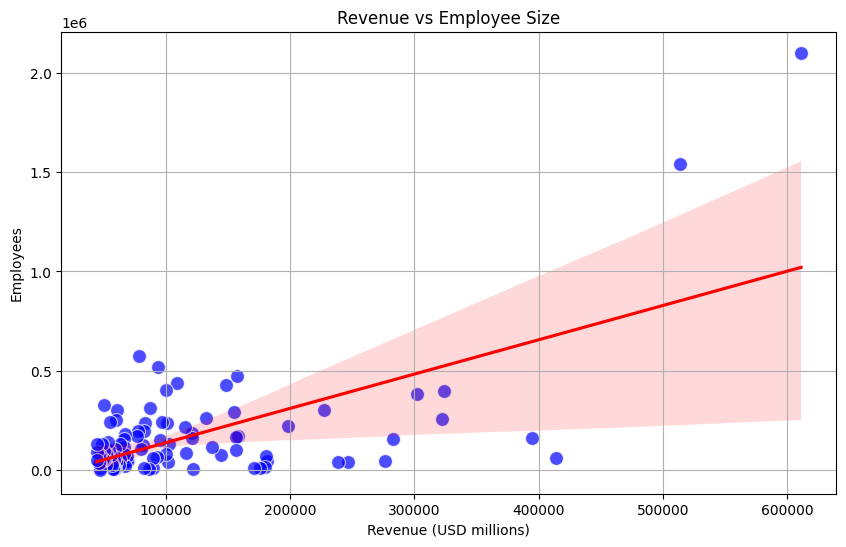

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace 'your_dataset.csv' with your actual dataset path)
Dataset = pd.read_excel("./Largest Companies In USA by Revenue.xlsx")

# # Convert string columns to float
# quantitative_cols = ['Revenue (USD millions)', 'Revenue growth']

# # Remove commas and percentage sign from 'Employees' and 'Revenue growth' columns
# df['Employees'] = df['Employees'].str.replace(',', '')
# df['Revenue growth'] = df['Revenue growth'].str.rstrip('%')

# # Convert to float
# df[quantitative_cols] = df[quantitative_cols].astype(float)
# df['Employees'] = df['Employees'].astype(float)

# Create a Dataset from DataFram

# Extracting relevant columns
revenue_employee_df = Dataset[['Revenue (USD millions)', 'Employees']]

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Revenue (USD millions)', y='Employees', data=revenue_employee_df, s=100, color='blue', alpha=0.7)
plt.title('Revenue vs Employee Size')
plt.xlabel('Revenue (USD millions)')
plt.ylabel('Employees')
plt.grid(True)

# Optionally, you can add a regression line
sns.regplot(x='Revenue (USD millions)', y='Employees', data=revenue_employee_df, scatter=False, color='red')

plt.show()
